In [74]:
import pandas as pd
import numpy as np
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df=pd.read_csv(url)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head() 
# DataSet Ready!

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [75]:
df.price = pd.to_numeric(df.price, errors='coerce').fillna(0).astype(np.int64) 
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce').fillna(0).astype(np.int64) 

In [25]:
x_data=df.drop('price',axis=1)
y_data = df['price']

In [76]:
#SLR (Single linear regression)
from sklearn.linear_model import LinearRegression # importing linear model from scikit learn

In [77]:
lm=LinearRegression() # assigning an object 'lm' using constructor (to the linearregressionfn)

In [78]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
# Use train_test_split for model evaluation split data into training and testing sets where 15% is for training set
# Random_state=1 for producing same results on execution of the function

number of test samples : 31
number of training samples: 173


In [79]:
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
#Fit/Train the model with 4 different features as above

LinearRegression()

In [80]:
yhat_train = lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]
#Prediction using training data

array([15226.13470632,  6991.48485534, 12490.16917955,  5733.47596918,
       11747.94944698])

In [81]:
yhat_test = lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]
#Prediction using testing data

array([20992.55591218, 16808.97920445,  4425.67148675, 11673.78325583,
       16069.04757193])

In [82]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

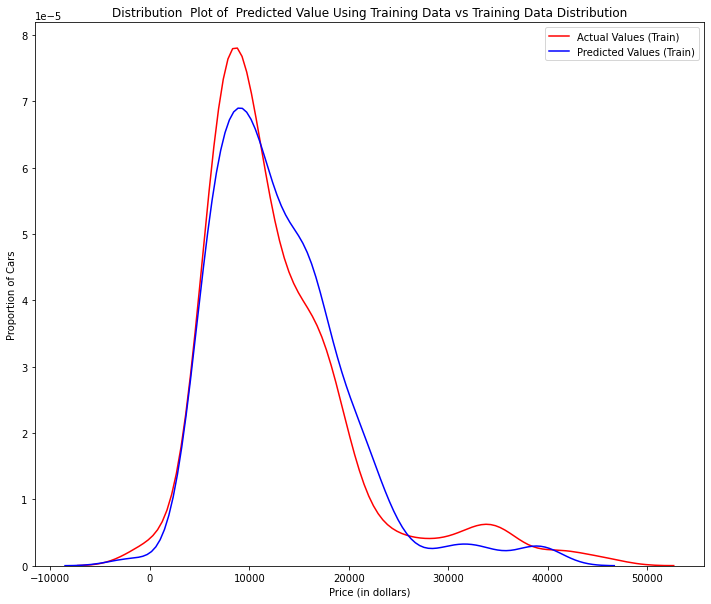

In [84]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
# Plot for predicted value using training data v/s data distribution of training data

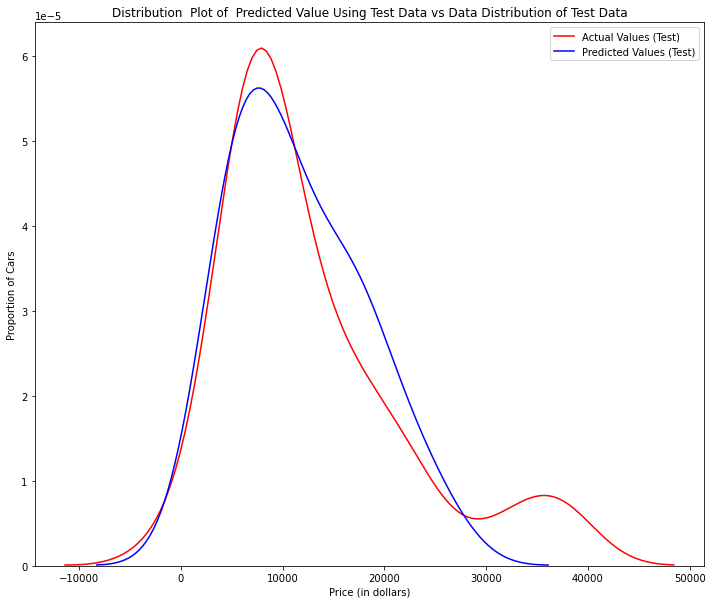

In [85]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)
# Plot for predicted value using test data v/s data distribution of test data
#Figure 1 better at fitting data as diff in ranges 5000 to 15000 where shape is exceptionally different

In [86]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [87]:
#MLR (Multiple linear regression)
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']] 
# extract predictor variables from data set and store/assign them to z

In [88]:
X=df['price']

In [89]:
lm.fit(Z,df['price']) # Train/fit model as before to get constants and intercepts

LinearRegression()

In [90]:
print(lm.coef_)
print(lm.intercept_)
# display the coeffecients i.e. b1,b2,b3,b4 
# display the coeffecient i.e. b0 (intercept)

[  -4.54225012    3.10471608  113.44806087 -175.07962843]
-3527.43960049813


In [91]:
yhat=lm.predict(X)
yhat
# finally predicting or calculating yhat to get estimation equation

ValueError: Expected 2D array, got 1D array instead:
array=[16500 16500 13950 17450 15250 17710 18920 23875     0 16430 16925 20970
 21105 24565 30760 41315 36880  5151  6295  6575  5572  6377  7957  6229
  6692  7609  8558  8921 12964  6479  6855  5399  6529  7129  7295  7295
  7895  9095  8845 10295 12945 10345  6785     0     0 11048 32250 35550
 36000  5195  6095  6795  6695  7395 10945 11845 13645 15645  8845  8495
 10595 10245 10795 11245 18280 18344 25552 28248 28176 31600 34184 35056
 40960 45400 16503  5389  6189  6669  7689  9959  8499 12629 14869 14489
  6989  8189  9279  9279  5499  7099  6649  6849  7349  7299  7799  7499
  7999  8249  8949  9549 13499 14399 13499 17199 19699 18399 11900 13200
 12440 13860 15580 16900 16695 17075 16630 17950 18150  5572  7957  6229
  6692  7609  8921 12764 22018 32528 34028 37028     0  9295  9895 11850
 12170 15040 15510 18150 18620  5118  7053  7603  7126  7775  9960  9233
 11259  7463 10198  8013 11694  5348  6338  6488  6918  7898  8778  6938
  7198  7898  7788  7738  8358  9258  8058  8238  9298  9538  8449  9639
  9989 11199 11549 17669  8948 10698  9988 10898 11248 16558 15998 15690
 15750  7775  7975  7995  8195  8495  9495  9995 11595  9980 13295 13845
 12290 12940 13415 15985 16515 18420 18950 16845 19045 21485 22470 22625].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.